## Work
1. 請將 Epoch 加到 500 個，並觀察 learning curve 的走勢
2. 請將 Optimizer 換成 SGD，並觀察 learning curve 的走勢

In [1]:
import os
import keras

# 本作業可以不需使用 GPU, 將 GPU 設定為 "無" (若有 GPU 且想開啟，可設為 "0")
os.environ["CUDA_VISIBLE_DEVICES"] = ""

Using TensorFlow backend.


In [2]:
# 從 Keras 的內建功能中，取得 train 與 test 資料集
train, test = keras.datasets.cifar10.load_data()

In [3]:
# 將 X 與 Y 獨立放進變數
x_train, y_train = train
x_test, y_test = test
# 資料前處理 - 標準化
x_train = x_train / 255.
x_test = x_test / 255.

# 將資料從圖形 (RGB) 轉為向量 (Single Vector)
x_train = x_train.reshape((len(x_train), -1))
x_test = x_test.reshape((len(x_test), -1))

# 將目標轉為 one-hot encoding
y_train = keras.utils.to_categorical(y_train, num_classes=10)
y_test = keras.utils.to_categorical(y_test, num_classes=10)

In [6]:
print(f'x_train shape:{x_train.shape}')
print(f'x_test shape:{x_test.shape}')
print(f'y_train shape:{y_train.shape}')
print(f'y_test shape:{y_test.shape}')

x_train shape:(50000, 3072)
x_test shape:(10000, 3072)
y_train shape:(50000, 10)
y_test shape:(10000, 10)


In [9]:
def build_mlp():
    """Code Here
    建立你的神經網路
    """
    input_layer = keras.layers.Input([x_train.shape[-1]])
    x = keras.layers.Dense(units=512, activation="relu")(input_layer)
    x = keras.layers.Dense(units=256, activation="relu")(x)
    x = keras.layers.Dense(units=128, activation="relu")(x)
    out = keras.layers.Dense(units=10, activation="softmax")(x)
    model = keras.models.Model(inputs=[input_layer], outputs=[out])
    return model
model = build_mlp()
model.summary()

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_3 (InputLayer)         [(None, 3072)]            0         
_________________________________________________________________
dense_5 (Dense)              (None, 512)               1573376   
_________________________________________________________________
dense_6 (Dense)              (None, 256)               131328    
_________________________________________________________________
dense_7 (Dense)              (None, 128)               32896     
_________________________________________________________________
dense_8 (Dense)              (None, 10)                1290      
Total params: 1,738,890
Trainable params: 1,738,890
Non-trainable params: 0
_________________________________________________________________


In [10]:
"""
Compile 模型
"""
optimizer = keras.optimizers.SGD(learning_rate=0.01, momentum=0.0, nesterov=False)
model.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer=optimizer)


In [11]:
"""
設定要訓練的 Epoch 數
"""
model.fit(x_train, y_train, 
          epochs=500, 
          batch_size=256, 
          validation_data=(x_test, y_test), 
          shuffle=True)

Epoch 1/500
196/196 [==============================] - 4s 18ms/step - loss: 2.0924 - accuracy: 0.2561 - val_loss: 1.9907 - val_accuracy: 0.2785
Epoch 2/500
196/196 [==============================] - 4s 18ms/step - loss: 1.9026 - accuracy: 0.3277 - val_loss: 1.8919 - val_accuracy: 0.3308
Epoch 3/500
196/196 [==============================] - 4s 20ms/step - loss: 1.8318 - accuracy: 0.3525 - val_loss: 1.8894 - val_accuracy: 0.3052
Epoch 4/500
196/196 [==============================] - 4s 21ms/step - loss: 1.7852 - accuracy: 0.3705 - val_loss: 1.8352 - val_accuracy: 0.3446
Epoch 5/500
196/196 [==============================] - 4s 21ms/step - loss: 1.7481 - accuracy: 0.3837 - val_loss: 1.7487 - val_accuracy: 0.3767
Epoch 6/500
196/196 [==============================] - 7s 35ms/step - loss: 1.7169 - accuracy: 0.3942 - val_loss: 1.6951 - val_accuracy: 0.4044
Epoch 7/500
196/196 [==============================] - 5s 24ms/step - loss: 1.6873 - accuracy: 0.4047 - val_loss: 1.7043 - val_accuracy:

196/196 [==============================] - 4s 22ms/step - loss: 1.2023 - accuracy: 0.5780 - val_loss: 1.4007 - val_accuracy: 0.4985
Epoch 58/500
196/196 [==============================] - 4s 19ms/step - loss: 1.1904 - accuracy: 0.5843 - val_loss: 1.3627 - val_accuracy: 0.5164
Epoch 59/500
196/196 [==============================] - 4s 19ms/step - loss: 1.1908 - accuracy: 0.5847 - val_loss: 1.4293 - val_accuracy: 0.4922
Epoch 60/500
196/196 [==============================] - 4s 21ms/step - loss: 1.1880 - accuracy: 0.5850 - val_loss: 1.3522 - val_accuracy: 0.5223
Epoch 61/500
196/196 [==============================] - 5s 28ms/step - loss: 1.1784 - accuracy: 0.5872 - val_loss: 1.5245 - val_accuracy: 0.4663
Epoch 62/500
196/196 [==============================] - 5s 24ms/step - loss: 1.1797 - accuracy: 0.5860 - val_loss: 1.4058 - val_accuracy: 0.4986
Epoch 63/500
196/196 [==============================] - 6s 28ms/step - loss: 1.1681 - accuracy: 0.5905 - val_loss: 1.3883 - val_accuracy: 0.509

196/196 [==============================] - 4s 20ms/step - loss: 0.9044 - accuracy: 0.6845 - val_loss: 1.4421 - val_accuracy: 0.5134
Epoch 114/500
196/196 [==============================] - 4s 20ms/step - loss: 0.8996 - accuracy: 0.6877 - val_loss: 1.3917 - val_accuracy: 0.5265
Epoch 115/500
196/196 [==============================] - 4s 21ms/step - loss: 0.8943 - accuracy: 0.6891 - val_loss: 1.4188 - val_accuracy: 0.5272
Epoch 116/500
196/196 [==============================] - 4s 20ms/step - loss: 0.8881 - accuracy: 0.6913 - val_loss: 1.5558 - val_accuracy: 0.4977
Epoch 117/500
196/196 [==============================] - 4s 21ms/step - loss: 0.8913 - accuracy: 0.6911 - val_loss: 1.3526 - val_accuracy: 0.5437
Epoch 118/500
196/196 [==============================] - 4s 19ms/step - loss: 0.8772 - accuracy: 0.6958 - val_loss: 1.6037 - val_accuracy: 0.4718
Epoch 119/500
196/196 [==============================] - 4s 20ms/step - loss: 0.8672 - accuracy: 0.6986 - val_loss: 1.4148 - val_accuracy:

196/196 [==============================] - 4s 20ms/step - loss: 0.6316 - accuracy: 0.7833 - val_loss: 1.5156 - val_accuracy: 0.5332
Epoch 170/500
196/196 [==============================] - 4s 20ms/step - loss: 0.6127 - accuracy: 0.7912 - val_loss: 1.7704 - val_accuracy: 0.5054
Epoch 171/500
196/196 [==============================] - 4s 19ms/step - loss: 0.6283 - accuracy: 0.7853 - val_loss: 1.5400 - val_accuracy: 0.5275
Epoch 172/500
196/196 [==============================] - 4s 21ms/step - loss: 0.6198 - accuracy: 0.7902 - val_loss: 1.7006 - val_accuracy: 0.5056
Epoch 173/500
196/196 [==============================] - 4s 21ms/step - loss: 0.6026 - accuracy: 0.7938 - val_loss: 1.5352 - val_accuracy: 0.5232
Epoch 174/500
196/196 [==============================] - 4s 19ms/step - loss: 0.5999 - accuracy: 0.7975 - val_loss: 1.7241 - val_accuracy: 0.5073
Epoch 175/500
196/196 [==============================] - 4s 20ms/step - loss: 0.5938 - accuracy: 0.7986 - val_loss: 1.7078 - val_accuracy:

196/196 [==============================] - 4s 23ms/step - loss: 0.3788 - accuracy: 0.8742 - val_loss: 1.9456 - val_accuracy: 0.5165
Epoch 226/500
196/196 [==============================] - 5s 25ms/step - loss: 0.3584 - accuracy: 0.8878 - val_loss: 1.9305 - val_accuracy: 0.5278
Epoch 227/500
196/196 [==============================] - 4s 23ms/step - loss: 0.3857 - accuracy: 0.8757 - val_loss: 1.9863 - val_accuracy: 0.5057
Epoch 228/500
196/196 [==============================] - 5s 24ms/step - loss: 0.3858 - accuracy: 0.8768 - val_loss: 2.1136 - val_accuracy: 0.4855
Epoch 229/500
196/196 [==============================] - 5s 25ms/step - loss: 0.3575 - accuracy: 0.8877 - val_loss: 1.8352 - val_accuracy: 0.5265
Epoch 230/500
196/196 [==============================] - 4s 21ms/step - loss: 0.3797 - accuracy: 0.8805 - val_loss: 1.7725 - val_accuracy: 0.5408
Epoch 231/500
196/196 [==============================] - 4s 21ms/step - loss: 0.3625 - accuracy: 0.8863 - val_loss: 1.7572 - val_accuracy:

196/196 [==============================] - 9s 47ms/step - loss: 0.2118 - accuracy: 0.9442 - val_loss: 2.1931 - val_accuracy: 0.5322
Epoch 282/500
196/196 [==============================] - 9s 45ms/step - loss: 0.1681 - accuracy: 0.9553 - val_loss: 2.3187 - val_accuracy: 0.5281
Epoch 283/500
196/196 [==============================] - 8s 42ms/step - loss: 0.1445 - accuracy: 0.9644 - val_loss: 2.3224 - val_accuracy: 0.5264
Epoch 284/500
196/196 [==============================] - 6s 32ms/step - loss: 0.2342 - accuracy: 0.9365 - val_loss: 2.3746 - val_accuracy: 0.5245
Epoch 285/500
196/196 [==============================] - 6s 32ms/step - loss: 0.2901 - accuracy: 0.9236 - val_loss: 2.4977 - val_accuracy: 0.4861
Epoch 286/500
196/196 [==============================] - 6s 32ms/step - loss: 0.1923 - accuracy: 0.9502 - val_loss: 2.1853 - val_accuracy: 0.5397
Epoch 287/500
196/196 [==============================] - 10s 50ms/step - loss: 0.1664 - accuracy: 0.9575 - val_loss: 2.1340 - val_accuracy

196/196 [==============================] - 6s 30ms/step - loss: 0.0561 - accuracy: 0.9923 - val_loss: 2.6025 - val_accuracy: 0.5282
Epoch 338/500
196/196 [==============================] - 6s 30ms/step - loss: 0.0559 - accuracy: 0.9919 - val_loss: 2.4965 - val_accuracy: 0.5316
Epoch 339/500
196/196 [==============================] - 7s 35ms/step - loss: 0.0542 - accuracy: 0.9922 - val_loss: 2.4521 - val_accuracy: 0.5474
Epoch 340/500
196/196 [==============================] - 7s 37ms/step - loss: 0.0501 - accuracy: 0.9936 - val_loss: 2.6934 - val_accuracy: 0.5195
Epoch 341/500
196/196 [==============================] - 6s 30ms/step - loss: 0.1527 - accuracy: 0.9677 - val_loss: 2.4916 - val_accuracy: 0.5448
Epoch 342/500
196/196 [==============================] - 6s 30ms/step - loss: 0.0497 - accuracy: 0.9936 - val_loss: 2.4867 - val_accuracy: 0.5382
Epoch 343/500
196/196 [==============================] - 5s 23ms/step - loss: 0.2488 - accuracy: 0.9469 - val_loss: 2.5738 - val_accuracy:

196/196 [==============================] - 4s 23ms/step - loss: 0.3234 - accuracy: 0.9188 - val_loss: 2.7198 - val_accuracy: 0.5389
Epoch 394/500
196/196 [==============================] - 5s 24ms/step - loss: 0.0263 - accuracy: 0.9982 - val_loss: 2.7054 - val_accuracy: 0.5459
Epoch 395/500
196/196 [==============================] - 5s 25ms/step - loss: 0.0236 - accuracy: 0.9987 - val_loss: 2.7162 - val_accuracy: 0.5488
Epoch 396/500
196/196 [==============================] - 6s 31ms/step - loss: 0.0228 - accuracy: 0.9986 - val_loss: 2.7595 - val_accuracy: 0.5427
Epoch 397/500
196/196 [==============================] - 5s 25ms/step - loss: 0.0215 - accuracy: 0.9988 - val_loss: 2.7553 - val_accuracy: 0.5437
Epoch 398/500
196/196 [==============================] - 4s 23ms/step - loss: 0.0210 - accuracy: 0.9988 - val_loss: 2.7709 - val_accuracy: 0.5431
Epoch 399/500
196/196 [==============================] - 5s 25ms/step - loss: 0.0207 - accuracy: 0.9988 - val_loss: 2.7728 - val_accuracy:

196/196 [==============================] - 5s 25ms/step - loss: 0.0095 - accuracy: 0.9998 - val_loss: 3.0647 - val_accuracy: 0.5427
Epoch 450/500
196/196 [==============================] - 5s 27ms/step - loss: 0.0094 - accuracy: 0.9998 - val_loss: 3.0739 - val_accuracy: 0.5426
Epoch 451/500
196/196 [==============================] - 5s 25ms/step - loss: 0.0094 - accuracy: 0.9997 - val_loss: 3.0951 - val_accuracy: 0.5465
Epoch 452/500
196/196 [==============================] - 5s 24ms/step - loss: 0.0091 - accuracy: 0.9998 - val_loss: 3.0750 - val_accuracy: 0.5468
Epoch 453/500
196/196 [==============================] - 5s 26ms/step - loss: 0.0091 - accuracy: 0.9999 - val_loss: 3.0765 - val_accuracy: 0.5447
Epoch 454/500
196/196 [==============================] - 5s 23ms/step - loss: 0.0089 - accuracy: 0.9999 - val_loss: 3.0832 - val_accuracy: 0.5480
Epoch 455/500
196/196 [==============================] - 5s 25ms/step - loss: 0.0089 - accuracy: 0.9999 - val_loss: 3.0970 - val_accuracy:

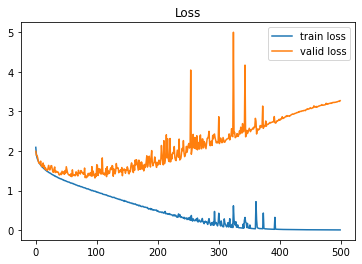

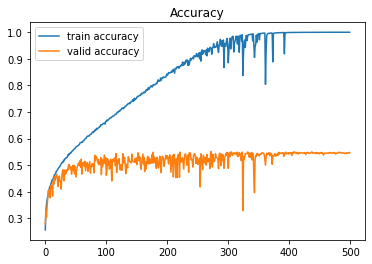

In [13]:
import matplotlib.pyplot as plt
# 以視覺畫方式檢視訓練過程

train_loss = model.history.history["loss"]
valid_loss = model.history.history["val_loss"]

train_acc = model.history.history["accuracy"]
valid_acc = model.history.history["val_accuracy"]

plt.plot(range(len(train_loss)), train_loss, label="train loss")
plt.plot(range(len(valid_loss)), valid_loss, label="valid loss")
plt.legend()
plt.title("Loss")
plt.show()

plt.plot(range(len(train_acc)), train_acc, label="train accuracy")
plt.plot(range(len(valid_acc)), valid_acc, label="valid accuracy")
plt.legend()
plt.title("Accuracy")
plt.show()